# Machine Learning project
## Predicting satisfaction with health of Estonian school workers
#### Kerli Mooses, Maarja Pajusalu,  Liisi Panov, Victor Rebecq

### Table of contents
- Preparation
- Descriptive statistics and data manipulation
- Predicting 'satisfaction with health' with different classification algorithms
    - Decision Tree Classifier
    - KNN classifier
    - Logistic Regression
    - Random Forest
    - Ensemble classification
- Try other predictions with our dataset
- Other models for predicting health satisfaction
    - Data
    - Clustering and prediction
    - K-Neighbours with different variables
    - DecisionTrees
    - Resample
    - Ensemble (wrong approach)
    - Ensemble (KNN, DT, LogReg)

    - Logistic Regression
    - KNN (other approach)
    - Random Forest (other approach)
    - Oversampling
    - KNN (other approach)
    - Random forest (other approach)
    - Log reg



### Preparation

In [2]:
import numpy as np

import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats
import sklearn
import seaborn
from sklearn.tree import DecisionTreeClassifier
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.linear_model import LogisticRegression 
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import mean_squared_error, confusion_matrix, accuracy_score, classification_report, recall_score, precision_score
from sklearn.utils import resample
from seaborn import boxplot, distplot

In [2]:
data = pd.read_excel('ML_database_TeachersAndAdmin.xlsx', sheet_name='ML_database')

In [3]:
data.head()

,Subject,Sedentary_min,Light_min,MVPA_min,N_of_days_with_30minMVPA,N_of_days_with_60minMVPA,N_measurement_days,Profession,Age,Gender,HowOftenDoRecreationalSportAtLeast30min,ActiveTransportPerDay_min,SatisfactionWithHealth,Weight_kg,Height_cm,BMI,SatisfactionWithJob,School,County
0,19001,776.84375,258.93750,31.18750,2,1,8,Teacher,44.0,2.0,6.0,20.0,1.0,77.0,175.0,25.1,1.0,School34,TartuCity
1,19002,695.34375,223.40625,36.50000,4,2,8,Teacher,53.0,2.0,1.0,65.0,2.0,79.0,159.0,31.2,1.0,School34,TartuCity
2,19004,623.09375,166.09375,128.40625,8,7,8,Administration,56.0,2.0,1.0,90.0,1.0,62.0,165.0,22.8,1.0,School34,TartuCity
3,19005,405.00000,178.00000,24.75000,2,0,3,Teacher,28.0,2.0,3.0,60.0,1.0,75.0,176.0,24.2,1.0,School34,TartuCity
4,19006,614.56250,238.62500,69.12500,7,5,8,Teacher,30.0,2.0,5.0,60.0,1.0,80.0,177.0,25.5,1.0,School34,TartuCity


In [4]:
#Rename most of the columns
data = data.rename(columns={"Subject": "ID", "N_of_days_with_30minMVPA": "N_days30minMVPA", "N_of_days_with_60minMVPA": "N_days60minMVPA", "N_measurement_days": "N_days", "HowOftenDoRecreationalSportAtLeast30min": "Sports30+min", "SatisfactionWithHealth": "Health_satisf", "SatisfactionWithJob": "Job_satisf", "Gender ": "Gender"})

In [5]:
#Coding and meaning of variables
################################
#Gender: 1 = male, 2 =female;
#Sports30+min: 1 = every day, 2 = 4-6 times per week, 3 = 2-3 times per week, 4 = once a week, 5 = 2-3 times per month, 6 = few times per year/not at all, 7 = cannot sport due to injury or illness;
#Health_satisf: 1 = (very) satisfied, 2 = not (at all) satisfied, 3 = do not know;
#Job_satisf ('In general, I'm satisfied with my job'): 1 = (totally) agree, 2 = do not agree, 3 = so-so;
#MVPA = moderate to vigorous activity, measured objectively

### Descriptive statistics and data manipulation

In [6]:
data.describe()

,ID,Sedentary_min,Light_min,MVPA_min,N_days30minMVPA,N_days60minMVPA,N_days,Age,Gender,Sports30+min,ActiveTransportPerDay_min,Health_satisf,Weight_kg,Height_cm,BMI,Job_satisf
count,888.000000,888.000000,888.000000,888.000000,888.000000,888.000000,888.000000,864.000000,872.000000,861.000000,740.000000,865.000000,852.000000,859.000000,852.000000,858.000000
mean,19716.373874,592.110116,213.743322,49.533358,4.412162,1.952703,6.422297,45.622685,1.878440,3.657375,33.637838,1.196532,73.105669,168.934808,25.574765,1.148019
std,413.528619,78.842587,49.429848,22.841699,2.038842,1.955541,1.162471,12.521175,0.326964,1.449910,48.997403,0.425721,14.672624,7.452636,4.652660,0.518279
min,19001.000000,339.083333,93.250000,7.625000,0.000000,0.000000,3.000000,19.000000,1.000000,1.000000,0.000000,1.000000,47.000000,140.000000,17.000000,1.000000
25%,19353.500000,543.214286,181.602679,33.448214,3.000000,0.000000,6.000000,35.750000,2.000000,3.000000,5.000000,1.000000,63.000000,164.000000,22.400000,1.000000
50%,19736.000000,591.000000,209.720982,45.328571,5.000000,1.000000,7.000000,46.000000,2.000000,3.000000,30.000000,1.000000,70.000000,168.000000,24.800000,1.000000
75%,20091.250000,640.866071,245.840774,62.446429,6.000000,3.000000,7.000000,55.250000,2.000000,5.000000,46.500000,1.000000,80.000000,173.000000,27.825000,1.000000
max,20374.000000,893.750000,415.071429,198.666667,10.000000,8.000000,13.000000,81.000000,2.000000,7.000000,900.000000,3.000000,176.000000,198.000000,65.400000,3.000000


In [7]:
#How many missing values are in the data
print(data.isnull().sum())

ID                             0
Sedentary_min                  0
Light_min                      0
MVPA_min                       0
N_days30minMVPA                0
N_days60minMVPA                0
N_days                         0
Profession                     0
Age                           24
Gender                        16
Sports30+min                  27
ActiveTransportPerDay_min    148
Health_satisf                 23
Weight_kg                     36
Height_cm                     29
BMI                           36
Job_satisf                    30
School                         0
County                         0
dtype: int64


In [8]:
#Labels of numeric values for next graphs
labels1 = {1:'Male', 2:'Female'}
labels2 = {1:'(very) satisfied', 2:'not (at all) satisfied', 3:'do not know'}

In [9]:
#make new, labelled variables for next graphs
gender = data.Gender.apply(labels1.get)
health_satisf = data.Health_satisf.apply(labels2.get)

In [10]:
#frequency table
health_satisf.value_counts()

(very) satisfied          705
not (at all) satisfied    150
do not know                10
Name: Health_satisf, dtype: int64

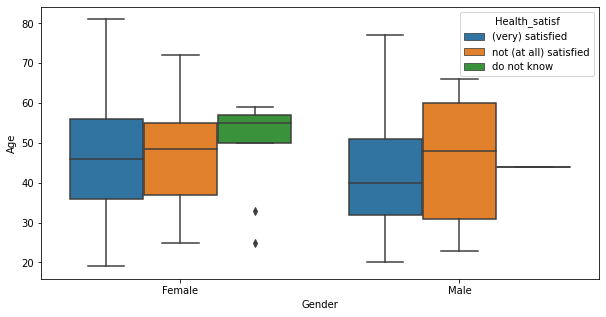

In [11]:
#Age, gender and satisfaction with health
plt.figure(figsize=(10, 5))
boxplot(x=gender, y='Age', hue=health_satisf, data=data)
plt.show()

Younger people are more satisfied with their health, especially men, but young women are more satisfied with their health than young men. Men who are not satisfied with their health, have a larger variability in age. Age is probably not a good predictor of satisfaction with health, as can be said from the correlation between them.

In [12]:
#Correlation of age and satisfaction with health
round(data[['Age', 'Health_satisf']].corr(), 2)

,Age,Health_satisf
Age,1.00,0.05
Health_satisf,0.05,1.00


In [13]:
#frequency table
data['Profession'].value_counts()

Teacher           730
Administration    158
Name: Profession, dtype: int64

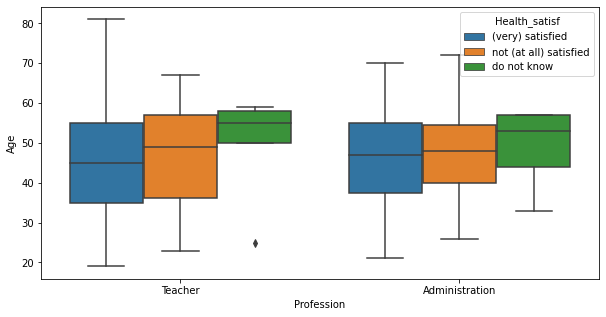

In [14]:
#Age, profession and satisfaction with health
plt.figure(figsize=(10, 5))
boxplot(x='Profession', y='Age', hue=health_satisf, data=data)
plt.show()

It seems that satisfaction with health is quite similar among different professions.

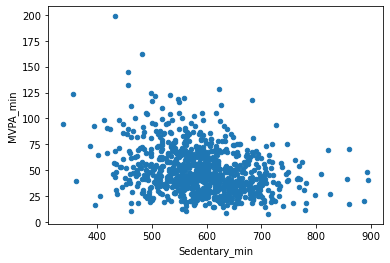

In [15]:
#Relation between moderate to vigorous physical activity time and sedentary time - just a check
data.plot.scatter(x='Sedentary_min', y='MVPA_min')
plt.show()

Moderate to vigorous physical activity time and sedentary time are negatively correlated, as expected.

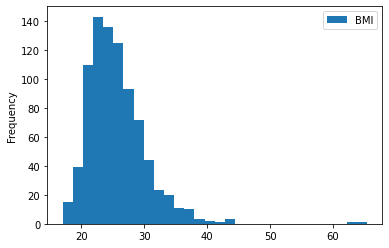

In [16]:
#BMI distribution
data['BMI'].plot.hist(bins=30, legend=True)
plt.show()

In [17]:
#There are some very high values of BMI in the dataset
data.loc[data.BMI > 40]

,ID,Sedentary_min,Light_min,MVPA_min,N_days30minMVPA,N_days60minMVPA,N_days,Profession,Age,Gender,Sports30+min,ActiveTransportPerDay_min,Health_satisf,Weight_kg,Height_cm,BMI,Job_satisf,School,County
36,19044,482.500000,224.785714,41.535714,5,1,7,Teacher,37.0,1.0,3.0,0.0,1.0,139.0,180.0,42.9,1.0,School35,TartuCity
98,19143,684.708333,215.916667,22.458333,2,0,6,Teacher,69.0,2.0,NaN,0.0,1.0,118.0,165.0,43.3,1.0,School23,Tartu
197,19324,672.093750,159.687500,38.812500,3,2,8,Teacher,31.0,2.0,2.0,30.0,1.0,110.0,161.5,42.2,1.0,School6,Jarva
295,19469,607.750000,143.700000,41.100000,5,1,5,Teacher,58.0,1.0,2.0,30.0,2.0,145.0,190.0,40.2,1.0,School31,Tartu
358,19579,629.791667,207.708333,32.000000,2,1,6,Teacher,51.0,2.0,4.0,60.0,1.0,115.0,168.0,40.7,1.0,School12,Tartu
368,19595,546.550000,249.300000,42.750000,4,2,5,Administration,64.0,2.0,2.0,30.0,2.0,140.0,178.0,44.2,NaN,School5,Laane
429,19711,447.107143,260.535714,61.000000,6,3,7,Administration,54.0,2.0,3.0,0.0,2.0,176.0,164.0,65.4,1.0,School28,Tartu
451,19745,461.500000,168.000000,11.000000,0,0,5,Teacher,48.0,2.0,3.0,50.0,1.0,163.0,161.0,62.9,1.0,School39,TartuCity


In [18]:
#replace weight and BMI values with NaN based on illogical values of BMI (>=60)
data['Weight_kg'].where((data['BMI'] < 60), pd.NA, inplace=True)
data['BMI'].where((data['BMI'] < 60), pd.NA, inplace=True)

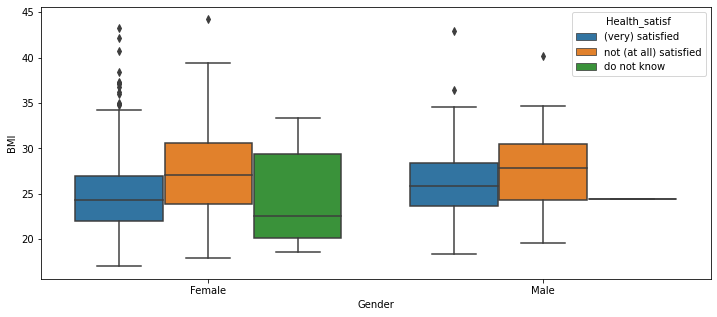

In [19]:
#Gender, BMI and satisfaction with health
plt.figure(figsize=(12, 5))
boxplot(x=gender, y='BMI', hue=health_satisf, data=data)
plt.show()

There are differences in satisfaction with health between people with lower and higher BMI: people with lower BMI tend to be more satisfied with health. The variance of BMI of those who are not satisfied with their health is very large, especially for women. The range of BMI is also overlapping for those who are satisfied and not satisfied with their health. This suggests that BMI is not a good predictor for all the classes of satisfaction with health.

In [20]:
#finding the sum of different activity levels for normalising the variables
col_list = ['Sedentary_min', 'Light_min', 'MVPA_min']
data['Activity_sum'] = data[col_list].sum(axis=1)  

print(np.min(data.Activity_sum/60))  #minimmum hours activity was measured
print(np.max(data.Activity_sum/60))  #maximum hours activity was measured

9.634375
19.302380952380968


In [21]:
#normalising the amount of different physical activity (because the amount of time the accelerometer was used varies between respondents)
data['Sedentary_prop'] = data['Sedentary_min'] / data['Activity_sum']
data['Light_prop'] = data['Light_min'] / data['Activity_sum']
data['MVPA_prop'] = data['MVPA_min'] / data['Activity_sum']

In [22]:
#Pearson correlations between BMI and different levels of activity
data_for_correlating = data[['BMI', 'Sedentary_prop', 'Light_prop', 'MVPA_prop']]
round(data_for_correlating.corr(), 2)

,BMI,Sedentary_prop,Light_prop,MVPA_prop
BMI,1.00,-0.03,0.09,-0.11
Sedentary_prop,-0.03,1.00,-0.91,-0.57
Light_prop,0.09,-0.91,1.00,0.17
MVPA_prop,-0.11,-0.57,0.17,1.00


BMI has weak correlation with different levels of physical activity, so probably it would be a good idea to use all these variables in predicting satisfaction with health.

### Predicting 'satisfaction with health' with different classification algorithms

In [23]:
#part of the dataset, without missing values
data_part1 = data.loc[:,['Age', 'Gender', 'BMI', 'Health_satisf', 'Sedentary_prop', 'Light_prop', 'MVPA_prop']].dropna()

In [24]:
#change the type of some variables to categorical
data_part1['Health_satisf'] = data_part1['Health_satisf'].astype(int).astype('category')
data_part1['Gender'] = data_part1['Gender'].astype(int).astype('category')

In [25]:
#frequency table
data_part1.Health_satisf.value_counts()

1    689
2    142
3     10
Name: Health_satisf, dtype: int64

In [26]:
#3="I don't know" is not a meaningful answer and as we have so few of them, let's drop them
indexNames = data_part1[(data_part1['Health_satisf'] == 3)].index
data_part1.drop(indexNames, inplace=True)

In [27]:
len(data_part1)

831

In [28]:
data_part1.head()

,Age,Gender,BMI,Health_satisf,Sedentary_prop,Light_prop,MVPA_prop
0,44.0,2,25.1,1,0.728085,0.242685,0.029230
1,53.0,2,31.2,2,0.727918,0.233872,0.038210
2,56.0,2,22.8,1,0.679052,0.181010,0.139938
3,28.0,2,24.2,1,0.666392,0.292884,0.040724
4,30.0,2,25.5,1,0.666328,0.258725,0.074947


In [29]:
#Divide data to training and test set + labels
y = data_part1['Health_satisf']
X = data_part1.drop('Health_satisf', axis=1)

train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.30, random_state=0)

In [30]:
print(len(train_X))
print(len(test_X))

581
250


In [31]:
train_y.value_counts()

1    483
2     98
3      0
Name: Health_satisf, dtype: int64

In [32]:
test_y.value_counts()

1    206
2     44
3      0
Name: Health_satisf, dtype: int64

In [33]:
#Since the distribution of answers to satisfaction with health is very different, let's upsample
X = pd.concat([train_X, train_y], axis=1)
satisfied = X[X.Health_satisf==1]
not_satisfied = X[X.Health_satisf==2]

In [34]:
len(not_satisfied)

98

In [35]:
#upsample minority
not_satisfied_upsampled = resample(not_satisfied, replace=True, n_samples=len(satisfied), random_state=0)

In [36]:
#combine majority and upsampled minority
upsampled = pd.concat([satisfied, not_satisfied_upsampled])

In [37]:
upsampled.Health_satisf.value_counts()  #now we have equal number of both classes in the training set

2    483
1    483
3      0
Name: Health_satisf, dtype: int64

In [38]:
#labels for training data and training data itself without labels
train_y = upsampled.Health_satisf
train_X = upsampled.drop('Health_satisf', axis=1)

#### Decision Tree Classifier

<b>Choosing the best depth for decision tree based on cross validation RMSE</b>

In [39]:
np.random_seed = 0

max_depths = list(range(1, 11))
n_folds = 4

fold_RMSEs = []
dtree_RMSEs = []

for parameter in max_depths:
    print(f'Calculating RMSE for decision tree with max depth of {parameter}...')
    
    dtree = DecisionTreeClassifier(max_depth=parameter)
    
    strat_folds = StratifiedKFold(n_splits=n_folds, shuffle=True, random_state=0)
    
    fold_index = 1
    
    for train_index, val_index in strat_folds.split(train_X, train_y):
        X_train = train_X.iloc[train_index, :]
        X_val = train_X.iloc[val_index, :]
        y_train = train_y.iloc[train_index]
        y_val = train_y.iloc[val_index]
             
        dtree.fit(X_train, y_train)
        
        val_pred = dtree.predict(X_val)
    
        fold_RMSEs.append(np.sqrt(mean_squared_error(y_val, val_pred)))
    
        fold_index += 1

    dtree_RMSEs.append(np.mean(fold_RMSEs))
    
    print(f'Average validation RMSE for tree with max depth {parameter} is {round(np.mean(fold_RMSEs), 3)}')

print(f'Minimum average validation RMSE is {round(np.min(dtree_RMSEs), 3)} for max depth of {max_depths[np.argmin(dtree_RMSEs)]}')

Calculating RMSE for decision tree with max depth of 1...
Average validation RMSE for tree with max depth 1 is 0.602
Calculating RMSE for decision tree with max depth of 2...
Average validation RMSE for tree with max depth 2 is 0.598
Calculating RMSE for decision tree with max depth of 3...
Average validation RMSE for tree with max depth 3 is 0.594
Calculating RMSE for decision tree with max depth of 4...
Average validation RMSE for tree with max depth 4 is 0.586
Calculating RMSE for decision tree with max depth of 5...
Average validation RMSE for tree with max depth 5 is 0.579
Calculating RMSE for decision tree with max depth of 6...
Average validation RMSE for tree with max depth 6 is 0.571
Calculating RMSE for decision tree with max depth of 7...
Average validation RMSE for tree with max depth 7 is 0.562
Calculating RMSE for decision tree with max depth of 8...
Average validation RMSE for tree with max depth 8 is 0.55
Calculating RMSE for decision tree with max depth of 9...
Average

The problem with this solution is that here we try to find the smallest RMSE for predicting classes 1 and 2 together (satisfied/not satisfied with health). It turns out that decision tree predicts class 1 much better than class 2 and thus we get the largest max depth possible from the cross validation, and also overfit the model. So, next I do cross validation for only predicting class 1 (satisfied with health), and we can see that the results are totally different.

In [40]:
np.random_seed = 0

max_depths = list(range(1, 11))
n_folds = 4

fold_RMSEs = []
dtree_RMSEs = []

for parameter in max_depths:
    print(f'Calculating RMSE for decision tree with max depth of {parameter}...')
    
    dtree = DecisionTreeClassifier(max_depth=parameter)
    
    strat_folds = StratifiedKFold(n_splits=n_folds, shuffle=True, random_state=0)
    
    fold_index = 1
    
    for train_index, val_index in strat_folds.split(train_X, train_y):
        X_train = train_X.iloc[train_index, :]
        X_val = train_X.iloc[val_index, :]
        y_train = train_y.iloc[train_index]
        y_val = train_y.iloc[val_index]
             
        dtree.fit(X_train, y_train)
        
        val_pred = dtree.predict(X_val.loc[y_val==1])
    
        fold_RMSEs.append(np.sqrt(mean_squared_error(y_val[y_val==1], val_pred)))
    
        fold_index += 1

    dtree_RMSEs.append(np.mean(fold_RMSEs))
    
    print(f'Average validation RMSE for tree with max depth {parameter} is {round(np.mean(fold_RMSEs), 3)}')

print(f'Minimum average validation RMSE is {round(np.min(dtree_RMSEs), 3)} for max depth of {max_depths[np.argmin(dtree_RMSEs)]}')

Calculating RMSE for decision tree with max depth of 1...
Average validation RMSE for tree with max depth 1 is 0.357
Calculating RMSE for decision tree with max depth of 2...
Average validation RMSE for tree with max depth 2 is 0.503
Calculating RMSE for decision tree with max depth of 3...
Average validation RMSE for tree with max depth 3 is 0.538
Calculating RMSE for decision tree with max depth of 4...
Average validation RMSE for tree with max depth 4 is 0.551
Calculating RMSE for decision tree with max depth of 5...
Average validation RMSE for tree with max depth 5 is 0.571
Calculating RMSE for decision tree with max depth of 6...
Average validation RMSE for tree with max depth 6 is 0.582
Calculating RMSE for decision tree with max depth of 7...
Average validation RMSE for tree with max depth 7 is 0.586
Calculating RMSE for decision tree with max depth of 8...
Average validation RMSE for tree with max depth 8 is 0.583
Calculating RMSE for decision tree with max depth of 9...
Averag

<b>Training decision tree based on results of cross validation when predicting both classes (1 and 2)</b>

In [41]:
np.random.seed(0)

dtree = DecisionTreeClassifier(max_depth=10, random_state=0)

In [42]:
dtree.fit(train_X, train_y)

DecisionTreeClassifier(max_depth=10, random_state=0)

In [43]:
y_pred_test = dtree.predict(test_X)

In [44]:
np.sqrt(mean_squared_error(test_y, y_pred_test))

0.6324555320336759

In [45]:
unique, counts = np.unique(y_pred_test, return_counts=True)
unique, counts

(array([1, 2], dtype=int64), array([156,  94], dtype=int64))

In [46]:
print(confusion_matrix(test_y, y_pred_test))

[[131  75]
 [ 25  19]]


In [47]:
#Recall is the number of true positives divided by the number of positive values in the test data (=sensitivity)
recall_score(test_y, y_pred_test, average=None)

array([0.63592233, 0.43181818])

In [48]:
#Precision is the ability of the classifier not to label a negative sample as positive (=correctly predicted as positive/actually positive)
precision_score(test_y, y_pred_test, average=None)

array([0.83974359, 0.20212766])

We can see that decision tree is quite bad at predicting both classes. Moreover, the model is not interpretable with depth 10.

<b>Training decision tree based on results of cross validation when trying to predict only class 1 </b>

In [49]:
np.random.seed(0)

dtree = DecisionTreeClassifier(max_depth=1, random_state=0)

In [50]:
dtree.fit(train_X, train_y)

DecisionTreeClassifier(max_depth=1, random_state=0)

In [51]:
y_pred_test = dtree.predict(test_X)

In [52]:
np.sqrt(mean_squared_error(test_y, y_pred_test))

0.4979959839195493

In [53]:
unique, counts = np.unique(y_pred_test, return_counts=True)
unique, counts

(array([1, 2], dtype=int64), array([198,  52], dtype=int64))

In [54]:
print(confusion_matrix(test_y, y_pred_test))

[[171  35]
 [ 27  17]]


In [55]:
#Recall is the number of true positives divided by the number of positive values in the test data (=sensitivity)
recall_dt = recall_score(test_y, y_pred_test, average=None)
recall_dt

array([0.83009709, 0.38636364])

In [56]:
#Precision is the ability of the classifier not to label a negative sample as positive (=correctly predicted as positive/actually positive)
prec_dt = precision_score(test_y, y_pred_test, average=None)
prec_dt

array([0.86363636, 0.32692308])

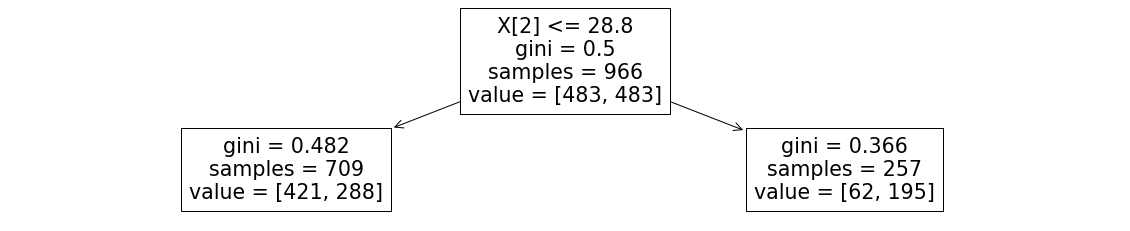

In [57]:
#Visualising decision tree
plt.figure(figsize=(20, 4))
sklearn.tree.plot_tree(dtree)
plt.show()

In [58]:
train_X.head()

,Age,Gender,BMI,Sedentary_prop,Light_prop,MVPA_prop
817,34.0,1,26.1,0.638286,0.248449,0.113264
153,53.0,2,22.9,0.680783,0.241023,0.078193
214,56.0,1,36.4,0.657103,0.282081,0.060816
631,65.0,2,24.3,0.751040,0.195878,0.053082
137,62.0,2,22.0,0.650712,0.302956,0.046332


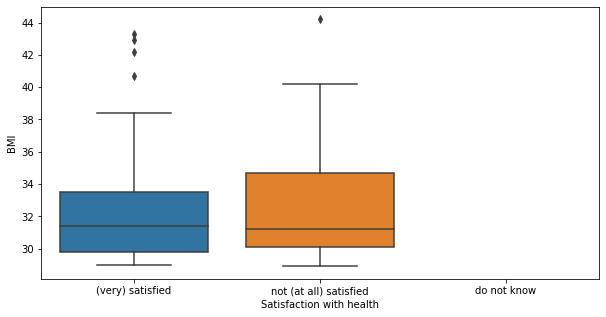

In [59]:
#let's see how does satisfaction with health vary for people with BMI higher than 28.8
temp_data = data_part1[['BMI', 'Health_satisf']].loc[data_part1['BMI'] > 28.8]
health_satisf = temp_data.Health_satisf.apply(labels2.get)  #make labelled variable for graph

plt.figure(figsize=(10, 5))
boxplot(x=health_satisf, y='BMI', data=temp_data)
plt.xlabel('Satisfaction with health')
plt.show()

As we can see, the simplest way to predict whether a person is <b>satisfied</b> with his or her health is to ask their BMI. We got 83% hit rate (true positives) for test set and also 86% precision. Unfortunately, we cannot predict if people are <b>not satisfied</b> with their health in this way. Those who have BMI 28.8 and over are equally satisfied and not satisfied with their health - there must be some other independent variable to predict satisfaction with health for them.

#### KNN classifier

In [60]:
np.random_seed = 0

K_values = list(range(3, 12, 2))
n_folds = 4

fold_RMSEs = []
knn_RMSEs = []

for k in K_values:
    print(f'Calculating RMSE for KNN with {k} neighbours...')
    
    knn = KNeighborsClassifier(n_neighbors=k)
    
    strat_folds = StratifiedKFold(n_splits=n_folds, shuffle=True, random_state=0)
    
    fold_index = 1
    
    for train_index, val_index in strat_folds.split(train_X, train_y):
        X_train = train_X.iloc[train_index, :]
        X_val = train_X.iloc[val_index, :]
        y_train = train_y.iloc[train_index]
        y_val = train_y.iloc[val_index]
             
        knn.fit(X_train, y_train)
        
        predictions_knn = knn.predict(X_val)

        fold_RMSEs.append(np.sqrt(mean_squared_error(y_val, predictions_knn)))
    
        fold_index += 1

    knn_RMSEs.append(np.mean(fold_RMSEs))
    
    print(f'Average validation RMSE for KNN with {k} neighbours is {round(np.mean(fold_RMSEs), 3)}')

print(f'Minimum average validation RMSE is {round(np.min(knn_RMSEs), 3)} for KNN with {K_values[np.argmin(knn_RMSEs)]} neighbours')

Calculating RMSE for KNN with 3 neighbours...
Average validation RMSE for KNN with 3 neighbours is 0.49
Calculating RMSE for KNN with 5 neighbours...
Average validation RMSE for KNN with 5 neighbours is 0.512
Calculating RMSE for KNN with 7 neighbours...
Average validation RMSE for KNN with 7 neighbours is 0.53
Calculating RMSE for KNN with 9 neighbours...
Average validation RMSE for KNN with 9 neighbours is 0.543
Calculating RMSE for KNN with 11 neighbours...
Average validation RMSE for KNN with 11 neighbours is 0.552
Minimum average validation RMSE is 0.49 for KNN with 3 neighbours


In [61]:
np.random.seed(0)
knn = KNeighborsClassifier(n_neighbors=3).fit(train_X, train_y)
predictions_knn = knn.predict(test_X)

In [62]:
#Recall is the number of true positives divided by the number of positive values in the test data (=sensitivity)
recall_knn = recall_score(test_y, predictions_knn, average=None)
recall_knn

array([0.73300971, 0.38636364])

In [63]:
#Precision is the ability of the classifier not to label a negative sample as positive (=correctly predicted as positive/actually positive)
prec_knn = precision_score(test_y, predictions_knn, average=None)
prec_knn

array([0.84831461, 0.23611111])

In [64]:
#Accuracy takes both classes together into account, so it actually doesn't tell us how well the model predicts classes 1 and 2 separately
accuracy_score(test_y, predictions_knn)

0.672

In [65]:
confusion_matrix(test_y, predictions_knn)  #real labels in rows, predicted labels in columns

array([[151,  55],
       [ 27,  17]], dtype=int64)

#### Logistic regression

There is actually no reason to believe in the linearity of our data and logistic regression is not good at using correlated predictors. So, here I will use only BMI, age, and proportion of day spent on moderate to vigorous activity as predictors.

In [66]:
np.random.seed(0)
logreg = LogisticRegression().fit(train_X[['BMI', 'Age', 'MVPA_prop']], train_y)
predictions_logreg = logreg.predict(test_X[['BMI', 'Age', 'MVPA_prop']])

In [67]:
accuracy_score(test_y, predictions_logreg)

0.632

In [68]:
recall_logreg = recall_score(test_y, predictions_logreg, average=None)
recall_logreg

array([0.62135922, 0.68181818])

In [69]:
prec_logreg = precision_score(test_y, predictions_logreg, average=None)
prec_logreg

array([0.90140845, 0.27777778])

In [70]:
confusion_matrix(test_y, predictions_logreg)

array([[128,  78],
       [ 14,  30]], dtype=int64)

The results of logistic regression suggest that there have to be some more variables to predict satisfaction with health (low recall means that many "positives" are missed). However, with that model we can be quite sure that when it predicts that a person is satisfied with health, he really is (high precision for class 1).

#### Random Forest Classifier

In [71]:
np.random.seed(0)
rf = RandomForestClassifier().fit(train_X, train_y)
predictions_rf = rf.predict(test_X)

In [72]:
#Accuracy takes both classes together into account, so it actually doesn't tell us how well the model predicts classes 1 and 2
accuracy_score(test_y, predictions_rf)

0.768

In [73]:
#Recall is the number of true positives divided by the number of positive values in the test data (=sensitivity or hit rate)
recall_rf = recall_score(test_y, predictions_rf, average=None)
recall_rf

array([0.88349515, 0.22727273])

In [74]:
#Precision is the ability of the classifier not to label a negative sample as positive (=correctly predicted as positive/actually positive)
prec_rf = precision_score(test_y, predictions_rf, average=None)
prec_rf

array([0.84259259, 0.29411765])

In [75]:
confusion_matrix(test_y, predictions_rf)  #real labels in rows, predicted labels in columns

array([[182,  24],
       [ 34,  10]], dtype=int64)

In [76]:
#importances that Random Forest model gives to predictor variables
[(train_X.columns[i], round(rf.feature_importances_[i], 2)) for i in range(0, len(rf.feature_importances_))]

[('Age', 0.15),
 ('Gender', 0.02),
 ('BMI', 0.24),
 ('Sedentary_prop', 0.21),
 ('Light_prop', 0.19),
 ('MVPA_prop', 0.2)]

Random Forest model gives 88% recall for "satisfied with health" when predicting it from 6 variables. The most important predictor is still BMI but now the model also takes into account the age of the person, and the proportion of time he/she spends on different levels of activity during the day. Gender has almost no impact in the model.

#### Ensemble classification

In [77]:
#Majority vote ensemble of three models with different predictor variables
np.random_seed = 0

model1 = DecisionTreeClassifier(max_depth=1)
model2 = KNeighborsClassifier(n_neighbors=3)
model3 = LogisticRegression()

model1.fit(np.array(train_X['BMI']).reshape(-1, 1), train_y)
model2.fit(train_X, train_y)
model3.fit(train_X[['BMI', 'Age', 'MVPA_prop']], train_y)

model1_pred = model1.predict(np.array(test_X['BMI']).reshape(-1, 1))
model2_pred = model2.predict(test_X)
model3_pred = model3.predict(test_X[['BMI', 'Age', 'MVPA_prop']])

In [78]:
predictions = pd.DataFrame({'model1': model1_pred, 'model2': model2_pred, 'model3': model3_pred})
predictions['ensemble'] = predictions[['model1', 'model2', 'model3']].mode(axis = 1)  #most popular prediction is chosen

predictions.head()

,model1,model2,model3,ensemble
0,1,1,1,1
1,1,1,2,1
2,1,2,1,1
3,1,1,1,1
4,2,2,2,2


In [79]:
#Accuracy takes both classes together into account, so it actually doesn't tell us how well the model predicts classes 1 and 2
accuracy_score(test_y, predictions['ensemble'])

0.732

In [80]:
#Recall is the number of true positives divided by the number of positive values in the test data (=sensitivity)
recall_ens = recall_score(test_y, predictions['ensemble'], average=None)
recall_ens

array([0.79126214, 0.45454545])

In [81]:
prec_ens = precision_score(test_y, predictions['ensemble'], average=None)
prec_ens

array([0.87165775, 0.31746032])

In [82]:
confusion_matrix(test_y, predictions['ensemble'])  #real labels in rows, predicted labels in columns

array([[163,  43],
       [ 24,  20]], dtype=int64)

In [83]:
print(f'''
Results for predicting whether a person is satisfied with his or her health

Recall and precision scores for different models
------------------------------------------------
Decision Tree with max depth 1: recall {round(recall_dt[0], 2)} and precision {round(prec_dt[0], 2)}
Random Forest: recall {round(recall_rf[0], 2)} and precision {round(prec_rf[0], 2)}
KNN with 3 neighbours: recall {round(recall_knn[0], 2)} and precision {round(prec_knn[0], 2)}
Logistic Regression: recall {round(recall_logreg[0], 2)} and precision {round(prec_logreg[0], 2)}
Majority vote ensemble of Decision Tree, KNN and Logistic Regression: recall {round(recall_ens[0], 2)} and precision {round(prec_ens[0], 2)}

Predicting whether a person is not satisfied with his or health failed.
'''
)


Results for predicting whether a person is satisfied with his or her health

Recall and precision scores for different models
------------------------------------------------
Decision Tree with max depth 1: recall 0.83 and precision 0.86
Random Forest: recall 0.88 and precision 0.84
KNN with 3 neighbours: recall 0.73 and precision 0.85
Logistic Regression: recall 0.62 and precision 0.9
Majority vote ensemble of Decision Tree, KNN and Logistic Regression: recall 0.79 and precision 0.87

Predicting whether a person is not satisfied with his or health failed.



We got the best hit rate of predicting whether a person is satisfied with health with random forest (88%) that takes into account age, gender, BMI, and proportions of day that is spent on light or moderate to vigorous physical activity, or being sedentary. The precision is 84% with this model. However, the simplest model of decision tree gives similar results with only BMI as predictor.

### Try other predictions with our dataset

Our main work were to predict the health's satisfaction. During the exploration of data, we were led to test simple models to predict why not the age or BMI of participants. While this operation is actually irrelevant, it can show how our data reacts to simple machine learning models.

In [12]:
#We re-read the data from scratch
data = pd.read_excel('ML_database_TeachersAndAdmin.xlsx', sheet_name='ML_database')
data = data.dropna(how = 'any', axis = 'rows')

#Then, the goal is to pass any 'string' columns into numbers
from sklearn.preprocessing import LabelEncoder
cols = data.dtypes[data.dtypes == 'O'].index #Here, we detect what columns contains string

label = LabelEncoder()
for col in cols:
    data[col] = label.fit(data[col]).transform(data[col])#Here, we replace all the string with number, according to the library LabelEncoder()

data.head()

,Subject,Sedentary_min,Light_min,MVPA_min,N_of_days_with_30minMVPA,N_of_days_with_60minMVPA,N_measurement_days,Profession,Age,Gender,HowOftenDoRecreationalSportAtLeast30min,ActiveTransportPerDay_min,SatisfactionWithHealth,Weight_kg,Height_cm,BMI,SatisfactionWithJob,School,County
0,19001,776.84375,258.93750,31.18750,2,1,8,1,44.0,2.0,6.0,20.0,1.0,77.0,175.0,25.1,1.0,27,12
1,19002,695.34375,223.40625,36.50000,4,2,8,1,53.0,2.0,1.0,65.0,2.0,79.0,159.0,31.2,1.0,27,12
2,19004,623.09375,166.09375,128.40625,8,7,8,0,56.0,2.0,1.0,90.0,1.0,62.0,165.0,22.8,1.0,27,12
3,19005,405.00000,178.00000,24.75000,2,0,3,1,28.0,2.0,3.0,60.0,1.0,75.0,176.0,24.2,1.0,27,12
4,19006,614.56250,238.62500,69.12500,7,5,8,1,30.0,2.0,5.0,60.0,1.0,80.0,177.0,25.5,1.0,27,12


We split the data into train and test. Here, we are going to split it and try to predict the age of each subject.

In [16]:
from sklearn.model_selection import train_test_split
train_X, val_X, train_y, val_y = train_test_split(data.drop(['Age'],axis = 1), data['Age'], 
                                                      random_state = 1111, 
                                                      test_size = 0.30) # you can also explicitely say how many observations will be in the validation set

In [14]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import mean_squared_error, confusion_matrix, accuracy_score, classification_report, recall_score

Now, we are applying some GBoost model to our prediction of the age of the participants

In [15]:
gboost = GradientBoostingClassifier()
gboost.fit(train_X, train_y)
predictions = gboost.predict(val_X)
print(predictions)
print(val_y)
print(accuracy_score(val_y,predictions))
print(np.sqrt(mean_squared_error(val_y,predictions)))

[39. 50. 45. 40. 29. 51. 51. 39. 44. 61. 59. 32. 43. 50. 39. 41. 40. 62.
 52. 60. 39. 39. 50. 61. 45. 40. 40. 61. 39. 54. 57. 39. 58. 57. 39. 26.
 50. 26. 23. 55. 50. 64. 60. 31. 31. 69. 40. 39. 40. 49. 50. 45. 39. 39.
 57. 39. 53. 31. 56. 50. 27. 45. 67. 52. 59. 34. 24. 62. 64. 26. 65. 57.
 43. 26. 61. 25. 39. 60. 39. 69. 35. 39. 24. 44. 49. 49. 21. 48. 61. 29.
 41. 31. 45. 37. 61. 55. 45. 66. 25. 30. 55. 57. 41. 44. 50. 24. 24. 57.
 34. 24. 50. 50. 62. 39. 25. 51. 38. 46. 29. 45. 39. 39. 21. 33. 55. 49.
 39. 39. 45. 45. 39. 24. 39. 32. 62. 53. 72. 58. 52. 45. 38. 59. 51. 60.
 30. 53. 59. 45. 49. 67. 22. 39. 28. 38. 43. 46. 50. 30. 25. 50. 32. 57.
 37. 57. 54. 57. 59. 39. 40. 55. 53. 36. 30. 36. 39. 45. 51. 61. 60. 39.
 64. 29. 54. 51. 53. 48. 46. 55. 50. 45. 62. 43. 34. 27. 41. 42. 39. 61.
 44. 41. 40. 53. 54. 49. 39. 38. 27. 55. 29. 36. 25. 72. 38.]
538    29.0
483    39.0
361    54.0
265    26.0
856    47.0
       ... 
744    28.0
440    35.0
646    41.0
60     32.0
123    60.0
Nam

So, as you can see, predicting the age is quite ... not working at all (2% of sucess with GBoost. You will find below some recap of our experimentation. 

In [29]:
from sklearn.model_selection import train_test_split
to_test = 'SatisfactionWithHealth'
train_X, val_X, train_y, val_y = train_test_split(data.drop([to_test ],axis = 1), data[to_test ], 
                                                      random_state = 1111, 
                                                      test_size = 0.30)

gboost = GradientBoostingClassifier()
gboost.fit(train_X, train_y)
predictions = gboost.predict(val_X)
print(predictions)
print(val_y)
print(accuracy_score(val_y,predictions))
print(np.sqrt(mean_squared_error(val_y,predictions)))

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 2. 1. 1. 1. 2. 1. 1. 1. 1. 2. 1. 1. 2. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 2. 2. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 2. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 2. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 2. 1. 2. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 2. 1. 1. 2. 1. 1. 2. 1. 1. 1. 2. 1. 2. 1.
 1. 2. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 2. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 2. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
538    2.0
483    2.0
361    2.0
265    1.0
856    1.0
      ... 
744    1.0
440    1.0
646    1.0
60     2.0
123    1.0
Name: SatisfactionWithHealth, Length: 213, dtype: float64
0.784037558685446
0.47963209687927216


We made all our final test we GBoost, because with KNN or RFC or DTC, it was quite similar but less acurate. Here's the result :
- Profession : Accuracy of 77% / RMSE of 0.48 -> quite ok to predict
- SatisfactionWithHealth : Accuracy of 78% / RMSE of 0.49 -> ok but our prediction from our work above is better
- SatisfactionWithJob : Accuracy of 89% / RMSE of 0.62 -> we may reconsider this result because there is maybe too many '1' satisfaction and this prediction isn't valuable
- School : Accuracy of 92% / RMSE of 4.01 -> good prediction
- County : Accuracy of 97% / RMSE of 1.13 -> really good prediction
- N_measurement_days / N_of_days_with_30minMVPA / N_of_days_with_60minMVPA / HowOftenDoRecreationalSportAtLeast30min : accuracy of 40% -> bad prediction

So, finally, we can say that :
- From this data, we can predict someone's job, satisfaction with health and job with ok precision, and were does the subject comes from with a really good precision.
- But we can't predict how many days the subject did 30min or 60min of MVPA, or how often he did recreational sports at least 30 min.

As said before, these test are really simple, and can't be used for exploitation in real life, but still worth a shot.

In [106]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# For plotting like a pro
!pip install plotnine
from plotnine import *

# Ready made stuff lives here:
import sklearn
from sklearn.neighbors import KNeighborsClassifier


I use dataframe, where Satisfaction with Health is binary (0- Satisfied; 1 - dissatisfied)


### Other models for predicting health satisfaction

In [107]:
df = pd.read_csv('ML_database_TeachersAndAdmin_2nerahulolu.csv')
df.head()

,Subject,Sedentary_min,Light_min,MVPA_min,N_of_days_with_30minMVPA,N_of_days_with_60minMVPA,N_measurement_days,Profession,Age,Sex,HowOftenDoRecreationalSportAtLeast30min,ActiveTransportPerDay_min,SatisfactionWithHealth,Weight_kg,Height_cm,BMI,SatisfactionWithJob,School,County
0,19001,777,259,31,2,1,8,Teacher,44.0,2,6.0,20.0,0,77.0,175.0,25.1,1.0,School34,TartuCity
1,19002,695,223,37,4,2,8,Teacher,53.0,2,1.0,65.0,1,79.0,159.0,31.2,1.0,School34,TartuCity
2,19004,623,166,128,8,7,8,Administration,56.0,2,1.0,90.0,0,62.0,165.0,22.8,1.0,School34,TartuCity
3,19005,405,178,25,2,0,3,Teacher,28.0,2,3.0,60.0,0,75.0,176.0,24.2,1.0,School34,TartuCity
4,19006,615,239,69,7,5,8,Teacher,30.0,2,5.0,60.0,0,80.0,177.0,25.5,1.0,School34,TartuCity


In [3]:
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [4]:
d = pd.read_excel('gdrive/My Drive/Colab Notebooks/ML_data2.xlsx')

In [5]:
d

,Subject,Sedentary_min,Light_min,MVPA_min,N_of_days_with_30minMVPA,N_of_days_with_60minMVPA,N_measurement_days,Profession,Age,Gender,HowOftenDoRecreationalSportAtLeast30min,ActiveTransportPerDay_min,SatisfactionWithHealth,Weight_kg,Height_cm,BMI,SatisfactionWithJob,School,County
0,19001,776.843750,258.937500,31.187500,2,1,8,Teacher,44.0,2.0,6.0,20.0,1.0,77.0,175.0,25.1,1.0,School34,TartuCity
1,19002,695.343750,223.406250,36.500000,4,2,8,Teacher,53.0,2.0,1.0,65.0,2.0,79.0,159.0,31.2,1.0,School34,TartuCity
2,19004,623.093750,166.093750,128.406250,8,7,8,Administration,56.0,2.0,1.0,90.0,1.0,62.0,165.0,22.8,1.0,School34,TartuCity
3,19005,405.000000,178.000000,24.750000,2,0,3,Teacher,28.0,2.0,3.0,60.0,1.0,75.0,176.0,24.2,1.0,School34,TartuCity
4,19006,614.562500,238.625000,69.125000,7,5,8,Teacher,30.0,2.0,5.0,60.0,1.0,80.0,177.0,25.5,1.0,School34,TartuCity
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
883,20369,735.214286,212.464286,56.964286,6,2,7,Teacher,34.0,2.0,3.0,30.0,1.0,59.0,160.0,23.0,1.0,School22,IdaViru
884,20371,586.285714,271.035714,85.428571,7,5,7,Teacher,43.0,2.0,2.0,300.0,1.0,71.0,164.0,26.4,1.0,School22,IdaViru
885,20372,648.107143,300.000000,74.142857,7,5,7,Teacher,33.0,2.0,5.0,150.0,1.0,79.0,179.0,24.7,3.0,School22,IdaViru
886,20373,574.178571,273.071429,61.250000,7,2,7,Teacher,46.0,2.0,3.0,15.0,1.0,61.0,158.0,24.4,1.0,School22,IdaViru


In [6]:
#d = d.dropna()
#d.head()


In [93]:
d.iloc[1:2, [-5]]

,Height_cm
1,159.0


#### Data

In [13]:
d.describe()

,Subject,Sedentary_min,Light_min,MVPA_min,N_of_days_with_30minMVPA,N_of_days_with_60minMVPA,N_measurement_days,Age,Gender,HowOftenDoRecreationalSportAtLeast30min,ActiveTransportPerDay_min,SatisfactionWithHealth,Weight_kg,Height_cm,BMI,SatisfactionWithJob
count,888.000000,888.000000,888.000000,888.000000,888.000000,888.000000,888.000000,864.000000,872.000000,861.000000,740.000000,865.000000,852.000000,859.000000,852.000000,858.000000
mean,19716.373874,592.110116,213.743322,49.533358,4.412162,1.952703,6.422297,45.622685,1.878440,3.657375,33.637838,1.196532,73.105669,168.934808,25.574765,1.148019
std,413.528619,78.842587,49.429848,22.841699,2.038842,1.955541,1.162471,12.521175,0.326964,1.449910,48.997403,0.425721,14.672624,7.452636,4.652660,0.518279
min,19001.000000,339.083333,93.250000,7.625000,0.000000,0.000000,3.000000,19.000000,1.000000,1.000000,0.000000,1.000000,47.000000,140.000000,17.000000,1.000000
25%,19353.500000,543.214286,181.602679,33.448214,3.000000,0.000000,6.000000,35.750000,2.000000,3.000000,5.000000,1.000000,63.000000,164.000000,22.400000,1.000000
50%,19736.000000,591.000000,209.720982,45.328571,5.000000,1.000000,7.000000,46.000000,2.000000,3.000000,30.000000,1.000000,70.000000,168.000000,24.800000,1.000000
75%,20091.250000,640.866071,245.840774,62.446429,6.000000,3.000000,7.000000,55.250000,2.000000,5.000000,46.500000,1.000000,80.000000,173.000000,27.825000,1.000000
max,20374.000000,893.750000,415.071429,198.666667,10.000000,8.000000,13.000000,81.000000,2.000000,7.000000,900.000000,3.000000,176.000000,198.000000,65.400000,3.000000


In [14]:
d["County"].unique()

array(['TartuCity', 'Tartu', 'Tallinn', 'Harju', 'Jogeva', 'Jarva',
       'Voru', 'Polva', 'Laane', 'Hiiu', 'Rapla', 'Saare', 'Parnu',
       'IdaViru'], dtype=object)

In [15]:
counties = d.groupby(["County"]).count()
schools = d.groupby(["School"]).count()

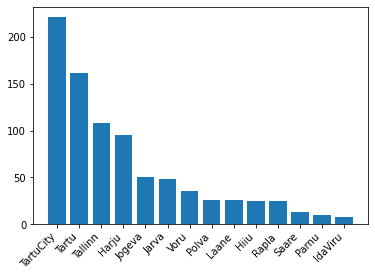

In [16]:
plt.bar(d["County"].unique(), counties['BMI'].sort_values(ascending=False))
plt.xticks(rotation=45, ha='right')
plt.show()

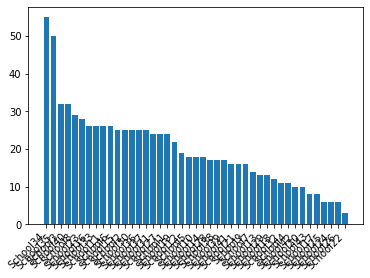

In [17]:
plt.bar(d["School"].unique(), schools['BMI'].sort_values(ascending=False))
plt.xticks(rotation=45, ha='right')
plt.show()

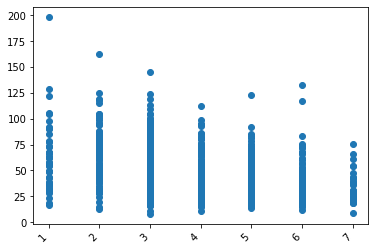

In [18]:
plt.scatter(d["HowOftenDoRecreationalSportAtLeast30min"], d["MVPA_min"])
plt.xticks(rotation=45, ha='right')
plt.show()

#### Clustering and prediction

In [19]:
d = d.dropna()
#d.head()

In [26]:
train, val = train_test_split(d, test_size = 0.2, random_state=111)

In [27]:
d.Sedentary_min

0      776.843750
1      695.343750
2      623.093750
3      405.000000
4      614.562500
          ...    
882    731.928571
883    735.214286
884    586.285714
885    648.107143
886    574.178571
Name: Sedentary_min, Length: 707, dtype: float64

In [28]:
train.shape


(565, 19)

In [33]:
val.shape

(142, 19)

In [118]:
val.iloc[1:2, :]

,Subject,Sedentary_min,Light_min,MVPA_min,N_of_days_with_30minMVPA,N_of_days_with_60minMVPA,N_measurement_days,Profession,Age,Gender,HowOftenDoRecreationalSportAtLeast30min,ActiveTransportPerDay_min,SatisfactionWithHealth,Weight_kg,Height_cm,BMI,SatisfactionWithJob,School,County
119,19194,591.46875,238.84375,54.34375,5,3,8,Teacher,63.0,2.0,3.0,90.0,1.0,60.0,163.0,22.6,1.0,School16,Harju


In [120]:
val.iloc[1:2, [1,2,3, 4, 5,6,8,9,11, 15]]

,Sedentary_min,Light_min,MVPA_min,N_of_days_with_30minMVPA,N_of_days_with_60minMVPA,N_measurement_days,Age,Gender,ActiveTransportPerDay_min,BMI
119,591.46875,238.84375,54.34375,5,3,8,63.0,2.0,90.0,22.6


In [113]:
val.describe()

,Subject,Sedentary_min,Light_min,MVPA_min,N_of_days_with_30minMVPA,N_of_days_with_60minMVPA,N_measurement_days,Age,Gender,HowOftenDoRecreationalSportAtLeast30min,ActiveTransportPerDay_min,SatisfactionWithHealth,Weight_kg,Height_cm,BMI,SatisfactionWithJob
count,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000
mean,19751.091549,595.269355,212.215034,52.417914,4.823944,2.253521,6.661972,44.563380,1.866197,3.584507,38.323944,1.211268,72.841056,169.605634,25.253521,1.183099
std,411.094990,72.940609,53.728021,21.953696,1.819123,2.067776,1.037505,12.341744,0.341645,1.221805,40.871108,0.442927,13.419445,7.943692,3.929388,0.578819
min,19002.000000,361.937500,93.250000,16.833333,0.000000,0.000000,3.000000,21.000000,1.000000,1.000000,0.000000,1.000000,47.000000,155.000000,17.800000,1.000000
25%,19411.250000,555.191964,176.156250,35.250000,3.000000,1.000000,6.000000,35.000000,2.000000,3.000000,10.000000,1.000000,65.000000,164.000000,22.425000,1.000000
50%,19811.000000,593.982143,210.916667,47.464286,5.000000,2.000000,7.000000,45.000000,2.000000,3.000000,30.000000,1.000000,70.000000,168.000000,24.650000,1.000000
75%,20110.500000,637.710938,247.294643,67.191964,6.000000,4.000000,7.000000,54.000000,2.000000,4.000000,60.000000,1.000000,80.000000,174.000000,27.375000,1.000000
max,20372.000000,858.805556,415.071429,121.958333,8.000000,7.000000,9.000000,73.000000,2.000000,7.000000,240.000000,3.000000,126.000000,193.000000,36.000000,3.000000


In [35]:
val.SatisfactionWithHealth.tail()

261    2.0
207    1.0
611    1.0
801    1.0
384    1.0
Name: SatisfactionWithHealth, dtype: float64

In [ ]:
'MVPA_min', 'Sedentary_min', 'Light_min', 'ActiveTransportPerDay_min'

In [129]:
train.dropna(subset=['MVPA_min', 'SatisfactionWithHealth', 'Sedentary_min'])

,Subject,Sedentary_min,Light_min,MVPA_min,N_of_days_with_30minMVPA,N_of_days_with_60minMVPA,N_measurement_days,Profession,Age,Gender,HowOftenDoRecreationalSportAtLeast30min,ActiveTransportPerDay_min,SatisfactionWithHealth,Weight_kg,Height_cm,BMI,SatisfactionWithJob,School,County
881,20367,780.892857,238.000000,37.357143,4,0,7,Teacher,34.0,2.0,6.0,30.0,2.0,70.0,171.0,23.9,1.0,School22,IdaViru
238,19379,697.041667,170.875000,42.916667,4,1,6,Administration,52.0,2.0,3.0,40.0,1.0,70.0,162.0,26.7,1.0,School36,TartuCity
259,19403,632.850000,179.700000,38.200000,3,1,5,Teacher,26.0,2.0,3.0,60.0,1.0,52.0,163.0,19.6,1.0,School36,TartuCity
0,19001,776.843750,258.937500,31.187500,2,1,8,Teacher,44.0,2.0,6.0,20.0,1.0,77.0,175.0,25.1,1.0,School34,TartuCity
732,20187,705.000000,223.392857,56.250000,5,3,7,Administration,44.0,1.0,3.0,30.0,2.0,85.0,170.0,29.4,1.0,School42,Tallinn
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144,19226,705.071429,146.464286,19.678571,0,0,7,Administration,48.0,2.0,5.0,30.0,1.0,58.0,166.0,21.0,1.0,School33,TartuCity
406,19666,656.214286,169.142857,67.214286,6,5,7,Teacher,42.0,2.0,2.0,15.0,1.0,67.0,162.0,25.5,1.0,School14,Tartu
854,20333,562.214286,139.392857,74.571429,6,5,7,Teacher,60.0,2.0,3.0,70.0,1.0,73.0,170.0,25.3,1.0,School26,Parnu
347,19565,686.321429,182.821429,49.750000,6,2,7,Teacher,63.0,2.0,3.0,45.0,1.0,70.0,175.0,22.9,3.0,School19,Tartu


In [39]:
val.dropna(subset=['MVPA_min', 'SatisfactionWithHealth', 'Sedentary_min'])

,Subject,Sedentary_min,Light_min,MVPA_min,N_of_days_with_30minMVPA,N_of_days_with_60minMVPA,N_measurement_days,Profession,Age,Gender,HowOftenDoRecreationalSportAtLeast30min,ActiveTransportPerDay_min,SatisfactionWithHealth,Weight_kg,Height_cm,BMI,SatisfactionWithJob,School,County
690,20135,615.678571,180.428571,44.142857,6,2,7,Teacher,59.0,2.0,3.0,0.0,2.0,90.0,163.0,33.9,1.0,School31,Tartu
119,19194,591.468750,238.843750,54.343750,5,3,8,Teacher,63.0,2.0,3.0,90.0,1.0,60.0,163.0,22.6,1.0,School16,Harju
441,19733,671.035714,125.357143,38.785714,5,1,7,Teacher,24.0,2.0,5.0,20.0,1.0,86.0,170.0,29.8,1.0,School38,TartuCity
502,19842,603.535714,265.464286,35.714286,4,0,7,Teacher,41.0,2.0,4.0,0.0,2.0,79.0,168.0,28.0,1.0,School21,Harju
390,19624,617.850000,137.300000,24.300000,2,0,5,Teacher,59.0,2.0,6.0,40.0,1.0,78.0,162.0,29.7,3.0,School5,Laane
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,19407,555.875000,169.625000,36.875000,2,1,4,Teacher,45.0,2.0,5.0,0.0,2.0,74.0,170.0,25.6,1.0,School37,TartuCity
207,19334,590.357143,215.928571,64.928571,6,2,7,Administration,46.0,2.0,3.0,30.0,1.0,60.0,170.0,20.8,1.0,School2,Voru
611,20019,543.107143,252.571429,28.250000,4,0,7,Teacher,49.0,2.0,3.0,120.0,1.0,65.0,158.0,26.0,3.0,School13,Jarva
801,20270,592.875000,215.343750,65.531250,5,3,8,Administration,34.0,2.0,4.0,3.0,1.0,96.0,176.0,31.0,1.0,School17,Harju


#### K-Neighbours with different variables

In [55]:
#print(train.shape)
k=4
model = KNeighborsClassifier(k)
model = model.fit(X = np.array(train['Sedentary_min']).reshape(-1, 1), y = np.array(train['SatisfactionWithHealth']).reshape(-1, 1)) 

#Num of correctly classified
train_predict = model.predict(np.array(train['Sedentary_min']).reshape(-1, 1))
train_accuracy = np.mean(train_predict == train.SatisfactionWithHealth)
#print(str(train_accuracy*100))

val_predict = model.predict(np.array(val['Sedentary_min']).reshape(-1, 1))
val_accuracy = np.mean(val_predict == val.SatisfactionWithHealth)
#print(val_accuracy)
n_correct = val_accuracy*len(val)

print(f"Validation accuracy on Val is {round((val_accuracy*100),2)}%")
print(f"Number of correctly classified rows on val is: {(val_accuracy*len(val))}")
print(f'On original data KNN guessed {train_accuracy*len(train)} obs. of {(len(train))}')

Validation accuracy on Val is 79.58%
Number of correctly classified rows on val is: 113.0
On original data KNN guessed 468.0 obs. of 565


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  after removing the cwd from sys.path.


In [56]:
#print(train.shape)
k=4
model = KNeighborsClassifier(k)
model = model.fit(X = np.array(train['MVPA_min']).reshape(-1, 1), y = np.array(train['SatisfactionWithHealth']).reshape(-1, 1)) 

#Num of correctly classified
train_predict = model.predict(np.array(train['MVPA_min']).reshape(-1, 1))
train_accuracy = np.mean(train_predict == train.SatisfactionWithHealth)
#print(str(train_accuracy*100))

val_predict = model.predict(np.array(val['MVPA_min']).reshape(-1, 1))
val_accuracy = np.mean(val_predict == val.SatisfactionWithHealth)
#print(val_accuracy)
n_correct = val_accuracy*len(val)

print(f"Validation accuracy on Val is {round((val_accuracy*100),2)}%")
print(f"Number of correctly classified rows on val is: {(val_accuracy*len(val))}")
print(f'On original data KNN guessed {train_accuracy*len(train)} obs. of {(len(train))}')


Validation accuracy on Val is 77.46%
Number of correctly classified rows on val is: 110.0
On original data KNN guessed 488.99999999999994 obs. of 565


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  after removing the cwd from sys.path.


In [57]:
print(train.iloc[:, 12].values)

[2. 1. 1. 1. 2. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 2. 2. 1. 1.
 1. 1. 1. 2. 2. 2. 1. 1. 1. 1. 1. 2. 1. 1. 1. 1. 1. 1. 1. 2. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 2. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 2. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 2. 1. 1. 1. 2. 1. 1. 2. 1. 1. 2. 1. 2. 1. 1. 2.
 1. 2. 1. 1. 1. 1. 1. 1. 2. 1. 2. 1. 2. 2. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 2. 1. 1. 1. 1. 1. 2. 1. 2. 1. 1. 1. 1. 2. 2. 1. 1. 1. 1. 1. 2. 1. 1. 1.
 1. 1. 1. 1. 1. 2. 1. 1. 1. 1. 1. 2. 1. 1. 2. 1. 2. 1. 1. 1. 2. 1. 1. 1.
 1. 2. 1. 1. 1. 1. 2. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 2. 1. 1.
 2. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 2. 2. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 2. 2. 1. 2. 1. 1. 1. 2. 2. 1. 1. 2. 1. 2. 2. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 2. 1. 1. 1. 2. 1. 1. 1. 1. 1. 2. 1. 1. 1. 1. 1. 1. 1.
 1. 2. 1. 1. 2. 1. 1. 1. 1. 1. 1. 1. 1. 2. 1. 1. 1. 2. 1. 1. 1. 1. 2. 1.
 1. 1. 2. 1. 1. 1. 1. 1. 1. 1. 2. 1. 1. 1. 1. 2. 1. 1. 1. 1. 2. 1. 2. 1.
 1. 2. 1. 1. 2. 1. 2. 2. 2. 1. 3. 1. 1. 1. 1. 1. 2.

In [58]:
X_train = train.iloc[:, [1, 3, 4, 9, 10, -4]].values
y_train = train.iloc[:, 12].values
X_val = val.iloc[:, [1, 3, 4, 9, 10, -4]].values
y_val = val.iloc[:, 12].values

In [59]:
k=4
model = KNeighborsClassifier(k)
model = model.fit(X = X_train, y = y_train) 

#Num of correctly classified
train_predict = model.predict(X_train)
train_accuracy = np.mean(train_predict == y_train)
#print(str(train_accuracy*100))

val_predict = model.predict(X_val)
val_accuracy = np.mean(val_predict == y_val)
#print(val_accuracy)
n_correct = val_accuracy*len(val)

print(f"Validation accuracy on Val is {round((val_accuracy*100),2)}%")
print(f"Number of correctly classified rows on val is: {(val_accuracy*len(val))} of {(len(val))}")
print(f'On train data KNN guessed {train_accuracy*len(train)} obs. of {(len(train))}')


Validation accuracy on Val is 80.28%
Number of correctly classified rows on val is: 114.0 of 142
On train data KNN guessed 471.0 obs. of 565


In [60]:
X_train = train.iloc[:, [1, 3]].values
y_train = train.iloc[:, 12].values
X_val = val.iloc[:, [1, 3]].values
y_val = val.iloc[:, 12].values

In [61]:
k=4
model = KNeighborsClassifier(k)
model = model.fit(X = X_train, y = y_train) 

#Num of correctly classified
train_predict = model.predict(X_train)
train_accuracy = np.mean(train_predict == y_train)
#print(str(train_accuracy*100))

val_predict = model.predict(X_val)
val_accuracy = np.mean(val_predict == y_val)
#print(val_accuracy)
n_correct = val_accuracy*len(val)

print(f"Validation accuracy on Val is {round((val_accuracy*100),2)}%")
print(f"Number of correctly classified rows on val is: {(val_accuracy*len(val))} of {(len(val))}")
print(f'On train data KNN guessed {train_accuracy*len(train)} obs. of {(len(train))}')


Validation accuracy on Val is 80.28%
Number of correctly classified rows on val is: 114.0 of 142
On train data KNN guessed 472.99999999999994 obs. of 565


In [62]:
#print(train.shape)
k=4
model = KNeighborsClassifier(k)
model = model.fit(X = np.array(train['MVPA_min']).reshape(-1, 1), y = np.array(train['SatisfactionWithHealth']).reshape(-1, 1)) 

#Num of correctly classified
train_predict = model.predict(np.array(train['MVPA_min']).reshape(-1, 1))
train_accuracy = np.mean(train_predict == train.SatisfactionWithHealth)
#print(str(train_accuracy*100))

val_predict = model.predict(np.array(val['MVPA_min']).reshape(-1, 1))
val_accuracy = np.mean(val_predict == val.SatisfactionWithHealth)
#print(val_accuracy)
n_correct = val_accuracy*len(val)

print(f"Validation accuracy on Val is {round((val_accuracy*100),2)}%")
print(f"Number of correctly classified rows on val is: {(val_accuracy*len(val))}")
print(f'On original data KNN guessed {train_accuracy*len(train)} obs. of {(len(train))}')


Validation accuracy on Val is 77.46%
Number of correctly classified rows on val is: 110.0
On original data KNN guessed 488.99999999999994 obs.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  after removing the cwd from sys.path.


#### DecisionTrees

In [63]:
model = DecisionTreeClassifier(max_depth=5)
model.fit(X = np.array(train['Sedentary_min']).reshape(-1, 1), y = np.array(train['SatisfactionWithHealth']).reshape(-1, 1)) 
val_predict = model.predict(np.array(val['Sedentary_min']).reshape(-1, 1))
#print(val_predict)
val_accuracy = np.mean(val_predict == val.SatisfactionWithHealth)
#print(val_accuracy)
n_correct = val_accuracy*len(val)

##### YOUR CODE ENDS ##### (please do not delete this line)
print(f'On original data DT guessed {n_correct} images of {len(val)}')
print(f'Accuracy {round((val_accuracy*100),2)}%')


On original data DT guessed 113.0 images of 142
Accuracy 79.58%


In [64]:
model = DecisionTreeClassifier(max_depth=4)
model.fit(X = np.array(train['Sedentary_min']).reshape(-1, 1), y = np.array(train['SatisfactionWithHealth']).reshape(-1, 1)) 
val_predict = model.predict(np.array(val['Sedentary_min']).reshape(-1, 1))
#print(val_predict)
val_accuracy = np.mean(val_predict == val.SatisfactionWithHealth)
#print(val_accuracy)
n_correct = val_accuracy*len(val)

##### YOUR CODE ENDS ##### (please do not delete this line)
print(f'On original data DT guessed {n_correct} images of {len(val)}')
print(f'Accuracy {round((val_accuracy*100),2)}%')


On original data DT guessed 113.0 images of 142
Accuracy 79.58%


In [155]:
model = DecisionTreeClassifier(max_depth=3)
model.fit(X = np.array(train['Sedentary_min']).reshape(-1, 1), y = np.array(train['SatisfactionWithHealth']).reshape(-1, 1)) 
val_predict = model.predict(np.array(val['Sedentary_min']).reshape(-1, 1))
#print(val_predict)
val_accuracy = np.mean(val_predict == val.SatisfactionWithHealth)
#print(val_accuracy)
n_correct = val_accuracy*len(val)

##### YOUR CODE ENDS ##### (please do not delete this line)
print(f'On original data DT guessed {n_correct} images of {len(val)}')
print(f'Accuracy {round((val_accuracy*100),2)}%')


On original data DT guessed 227.0 images of 283
Accuracy 80.21%


In [103]:
model = DecisionTreeClassifier(max_depth=4)
model.fit(X = np.array(train['BMI']).reshape(-1, 1), y = np.array(train['SatisfactionWithHealth']).reshape(-1, 1)) 
val_predict = model.predict(np.array(val['BMI']).reshape(-1, 1))
#print(val_predict)
val_accuracy = np.mean(val_predict == val.SatisfactionWithHealth)
#print(val_accuracy)
n_correct = val_accuracy*len(val)

##### YOUR CODE ENDS ##### (please do not delete this line)
print(f'On original data DT guessed {n_correct} images of {len(val)}')
print(f'Accuracy {round((val_accuracy*100),2)}%')


On original data DT guessed 115.0 images of 142
Accuracy 80.99%


In [125]:
X_train = train.iloc[:, [1, 3]].values
y_train = train.iloc[:, 12].values
X_val = val.iloc[:, [1, 3]].values
y_val = val.iloc[:, 12].values

In [126]:
##TRY

from sklearn.tree import DecisionTreeClassifier

np.random.seed(1111) # random seed for consistency

model1 = DecisionTreeClassifier()
model1.fit(X_train,y_train)
single_model_score = model1.score(X_val, y_val)*100
print(f"Accuracy of a single DT {single_model_score}%")

Accuracy of a single DT 71.83098591549296%


In [98]:
X_train = train.iloc[:, [-5]].values
y_train = train.iloc[:, 12].values
X_val = val.iloc[:, [-5]].values
y_val = val.iloc[:, 12].values

In [99]:
np.random.seed(1111) # random seed for consistency

model1 = DecisionTreeClassifier()
model1.fit(X_train,y_train)
single_model_score = model1.score(X_val, y_val)*100
print(f"Accuracy of a single DT {single_model_score}%")

Accuracy of a single DT 79.5774647887324%


In [100]:
X_train = train.loc[:, ['BMI']].values
y_train = train.iloc[:, 12].values
X_val = val.loc[:, ['BMI']].values
y_val = val.iloc[:, 12].values

In [71]:
np.random.seed(1111) # random seed for consistency

model1 = DecisionTreeClassifier()
model1.fit(X_train,y_train)
single_model_score = model1.score(X_val, y_val)*100
print(f"Accuracy of a single DT {single_model_score}%")

Accuracy of a single DT 78.87323943661971%


#### Resample

In [136]:
from sklearn.utils import resample
n_bootstraps = 3
np.random.seed(1111)

# the following line randomly chooses 80% of data and stores 
# row indices into a resamples variable this is done [n_bootstraps] times
resamples = [resample(train, n_samples = int(len(train)*0.8), replace = False).index.values for i in range(n_bootstraps)]

In [137]:
# first resample
train_resample1 = train.loc[resamples[0]]

# second resample
train_resample2 = train.loc[resamples[1]]

# third resample
train_resample3 = train.loc[resamples[2]]

In [138]:
# We couldn't use only one variable as
# we wouldn't be able to capture progress of each DT independently
model1 = DecisionTreeClassifier()
model2 = DecisionTreeClassifier()
model3 = DecisionTreeClassifier()

In [139]:
np.random.seed(1111) # random seed for consistency

# Note, that we cannot use VotingClassifier as before, 
# as each tree has to be trained on its own data
model1.fit(train_resample1[['MVPA_min', 'Sedentary_min', 'Light_min', 'ActiveTransportPerDay_min']], train_resample1[['SatisfactionWithHealth']])
model2.fit(train_resample2[['MVPA_min', 'Sedentary_min', 'Light_min', 'ActiveTransportPerDay_min']], train_resample2[['SatisfactionWithHealth']])
model3.fit(train_resample3[['MVPA_min', 'Sedentary_min', 'Light_min', 'ActiveTransportPerDay_min']], train_resample3[['SatisfactionWithHealth']])

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [140]:
start = -3 
stop = 4
ppu = 20 # points per unit

grid_data = generate_grid(start, stop, ppu)

grid_data['model1'] = model1.predict(grid_data[['x1', 'x2']])
grid_data['model2'] = model2.predict(grid_data[['x1', 'x2']])
grid_data['model3'] = model3.predict(grid_data[['x1', 'x2']])

NameError: ignored

In [ ]:
draw_points_ggplot2(train_resample1) + geom_point(data = grid_data, mapping = aes(x = 'x1', y = 'x2', colour = 'factor(model1)'),  size = .5, alpha = 0.2)

#### Ensemble (wrong approach)

In [ ]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge
lr = LinearRegression()
lambda_ = 1
# Ridge regression (template)
lr_ridge = Ridge(lambda_)
# Lasso 
lr_lasso = Lasso(lambda_)

In [ ]:
train1 = train[['MVPA_min', 'HowOftenDoRecreationalSportAtLeast30min', 'N_of_days_with_60minMVPA']]
train1
val1 = val[['MVPA_min', 'HowOftenDoRecreationalSportAtLeast30min', 'N_of_days_with_60minMVPA']]
val1

,MVPA_min,HowOftenDoRecreationalSportAtLeast30min,N_of_days_with_60minMVPA
690,44.142857,3.0,2
119,54.343750,3.0,3
441,38.785714,5.0,1
502,35.714286,4.0,0
390,24.300000,6.0,0
...,...,...,...
703,46.357143,3.0,2
565,105.000000,2.0,5
22,36.375000,4.0,0
630,98.500000,2.0,6


In [ ]:
lr.fit(train[['MVPA_min']], train[['SatisfactionWithHealth']])
lr_ridge.fit(train[['MVPA_min']], train[['SatisfactionWithHealth']])
lr_lasso.fit(train[['MVPA_min']], train[['SatisfactionWithHealth']])

Lasso(alpha=1, copy_X=True, fit_intercept=True, max_iter=1000, normalize=False,
      positive=False, precompute=False, random_state=None, selection='cyclic',
      tol=0.0001, warm_start=False)

In [ ]:
lr_pred = lr.predict(val[['MVPA_min']])
lr_ridge_pred = lr_ridge.predict(val[['MVPA_min']])
lr_lasso_pred = lr_lasso.predict(val[['MVPA_min']]).reshape((283,1))

In [ ]:
def rss(predicted, true): # RSS == Residual Sum of Squares
  return(np.sum((true - predicted)**2))

In [ ]:
lr_rss = rss(lr_pred, val[['SatisfactionWithHealth']])
lr_ridge_rss = rss(lr_ridge_pred, val[['SatisfactionWithHealth']])
lr_lasso_rss = rss(lr_lasso_pred, val[['SatisfactionWithHealth']])

print(f'RSS for Linear Regression: {np.array(lr_rss)[0]}')
print(f'RSS for Ridge Regression: {np.array(lr_ridge_rss)[0]}')
print(f'RSS for Lasso Regression: {np.array(lr_lasso_rss)[0]}')

RSS for Linear Regression: 49.23030341308943
RSS for Ridge Regression: 49.230298531055
RSS for Lasso Regression: 49.261580806300785


In [ ]:
lr.fit(train1, train[['SatisfactionWithHealth']])
lr_ridge.fit(train1, train[['SatisfactionWithHealth']])
lr_lasso.fit(train1, train[['SatisfactionWithHealth']])

Lasso(alpha=1, copy_X=True, fit_intercept=True, max_iter=1000, normalize=False,
      positive=False, precompute=False, random_state=None, selection='cyclic',
      tol=0.0001, warm_start=False)

In [ ]:
lr_pred = lr.predict(val1)
lr_ridge_pred = lr_ridge.predict(val1)
lr_lasso_pred = lr_lasso.predict(val1).reshape((283,1))

In [ ]:
lr_rss = rss(lr_pred, val[['SatisfactionWithHealth']])
lr_ridge_rss = rss(lr_ridge_pred, val[['SatisfactionWithHealth']])
lr_lasso_rss = rss(lr_lasso_pred, val[['SatisfactionWithHealth']])

print(f'RSS for Linear Regression: {np.array(lr_rss)[0]}')
print(f'RSS for Ridge Regression: {np.array(lr_ridge_rss)[0]}')
print(f'RSS for Lasso Regression: {np.array(lr_lasso_rss)[0]}')

RSS for Linear Regression: 48.49566789205779
RSS for Ridge Regression: 48.495529498198664
RSS for Lasso Regression: 49.261580806300785


In [ ]:
lr_pred

array([[1.17574383],
       [1.13697192],
       [1.25320507],
       [1.25326666],
       [1.32491968],
       [1.08871847],
       [1.11612761],
       [1.10916026],
       [1.2187831 ],
       [1.1511238 ],
       [1.06853213],
       [1.25648899],
       [1.26166931],
       [1.24863517],
       [1.19049927],
       [1.26667367],
       [1.26363238],
       [1.01917177],
       [1.20341023],
       [1.21854555],
       [1.22015193],
       [1.05591437],
       [1.11703438],
       [1.02930655],
       [1.19849461],
       [1.22184279],
       [1.1614171 ],
       [1.25632002],
       [1.17967658],
       [1.22033296],
       [1.08671546],
       [1.14272977],
       [1.08857278],
       [1.03677072],
       [1.18139195],
       [1.23290849],
       [1.204692  ],
       [1.06715343],
       [1.28650083],
       [1.20991935],
       [1.01409211],
       [1.25256064],
       [1.11621084],
       [1.14147846],
       [1.06774643],
       [1.23909668],
       [1.01381329],
       [1.216

In [ ]:
np.sum(lr_pred==val[['SatisfactionWithHealth']])

SatisfactionWithHealth    0
dtype: int64

In [ ]:
lr.fit(train[['BMI']], train[['SatisfactionWithHealth']])
lr_ridge.fit(train[['BMI']], train[['SatisfactionWithHealth']])
lr_lasso.fit(train[['BMI']], train[['SatisfactionWithHealth']])

lr_pred = lr.predict(val[['BMI']])
lr_ridge_pred = lr_ridge.predict(val[['BMI']])
lr_lasso_pred = lr_lasso.predict(val[['MVPA_min']]).reshape((283,1))

lr_rss = rss(lr_pred, val[['SatisfactionWithHealth']])
lr_ridge_rss = rss(lr_ridge_pred, val[['SatisfactionWithHealth']])
lr_lasso_rss = rss(lr_lasso_pred, val[['SatisfactionWithHealth']])

print(f'RSS for Linear Regression: {np.array(lr_rss)[0]}')
print(f'RSS for Ridge Regression: {np.array(lr_ridge_rss)[0]}')
print(f'RSS for Lasso Regression: {np.array(lr_lasso_rss)[0]}')

RSS for Linear Regression: 47.99183819601306
RSS for Ridge Regression: 47.99195797489318
RSS for Lasso Regression: 50.300017799928796


/usr/local/lib/python3.6/dist-packages/plotnine/layer.py:452: PlotnineWarning: geom_point : Removed 424 rows containing missing values.
  self.data = self.geom.handle_na(self.data)


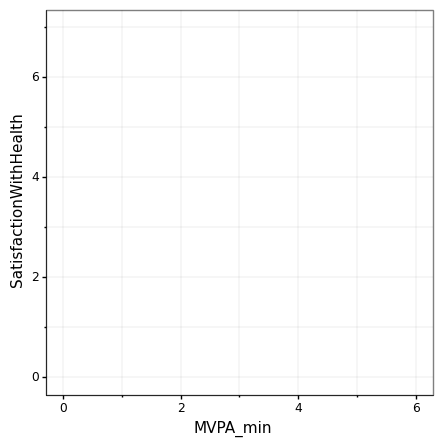

<ggplot: (-9223363242571646471)>

In [ ]:
fig = (
    ggplot(data = train,
          mapping = aes(x = 'MVPA_min', y = 'SatisfactionWithHealth')) +
    geom_point(fill = '#36B059', 
               size = 5.0,
               stroke = 2.5,
               colour = '#2BE062',
               shape = 'o') +
    labs(
        title ='',
        x = 'MVPA_min',
        y = 'SatisfactionWithHealth',
    ) +
    xlim(0, 6) +
    ylim(0, 7) +
    theme_bw() + 
    theme(figure_size = (5, 5),
          axis_line = element_line(size = 0.5, colour = "black"),
          panel_grid_major = element_line(size = 0.05, colour = "black"),
          panel_grid_minor = element_line(size = 0.05, colour = "black"),
          axis_text = element_text(colour ='black'))
)
fig

/usr/local/lib/python3.6/dist-packages/plotnine/layer.py:452: PlotnineWarning: geom_point : Removed 424 rows containing missing values.
  self.data = self.geom.handle_na(self.data)


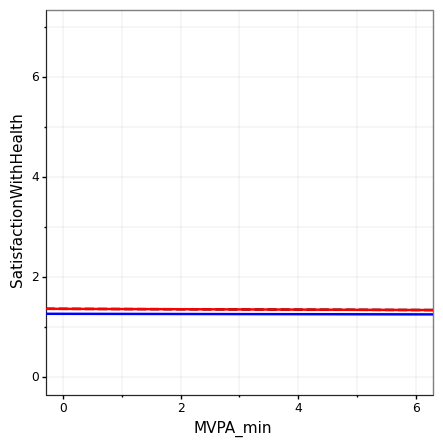

<ggplot: (8794283105996)>

In [ ]:
fig = fig + geom_abline(intercept = lr.intercept_, slope = lr.coef_[0], linetype="dashed", size=1)
fig = fig + geom_abline(intercept = lr_ridge.intercept_, slope = lr_ridge.coef_[0], color="red", linetype="solid", size=1)
fig = fig + geom_abline(intercept = lr_lasso.intercept_, slope = lr_lasso.coef_[0], color="blue", linetype="solid", size=1)
fig

#### Ensemble (KNN, DT, LogReg)

In [168]:
from sklearn.model_selection import train_test_split
train, val = train_test_split(d, random_state = 111, test_size = 0.30) 

In [169]:
X_train = train.iloc[:, [1,2,3]].values
y_train = train.iloc[:, 12].values
X_val = val.iloc[:, [1,2,3]].values
y_val = val.iloc[:, 12].values

In [170]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression 

np.random.seed(1111) # random seed for consistency

# define all three classifiers
model1 = DecisionTreeClassifier(max_depth = 2)
model2 = KNeighborsClassifier()
model3 = LogisticRegression()

# train classifiers
model1.fit(X_train,y_train)
model2.fit(X_train,y_train)
model3.fit(X_train,y_train)

# predict validation set
val['model1'] = model1.predict(X_val)
val['model2'] = model2.predict(X_val)
val['model3'] = model3.predict(X_val)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stab

In [171]:
val.head()

,Subject,Sedentary_min,Light_min,MVPA_min,N_of_days_with_30minMVPA,N_of_days_with_60minMVPA,N_measurement_days,Profession,Age,Gender,HowOftenDoRecreationalSportAtLeast30min,ActiveTransportPerDay_min,SatisfactionWithHealth,Weight_kg,Height_cm,BMI,SatisfactionWithJob,School,County,model1,model2,model3
690,20135,615.678571,180.428571,44.142857,6,2,7,Teacher,59.0,2.0,3.0,0.0,2.0,90.0,163.0,33.9,1.0,School31,Tartu,1.0,2.0,1.0
119,19194,591.468750,238.843750,54.343750,5,3,8,Teacher,63.0,2.0,3.0,90.0,1.0,60.0,163.0,22.6,1.0,School16,Harju,1.0,1.0,1.0
441,19733,671.035714,125.357143,38.785714,5,1,7,Teacher,24.0,2.0,5.0,20.0,1.0,86.0,170.0,29.8,1.0,School38,TartuCity,1.0,1.0,1.0
502,19842,603.535714,265.464286,35.714286,4,0,7,Teacher,41.0,2.0,4.0,0.0,2.0,79.0,168.0,28.0,1.0,School21,Harju,1.0,1.0,1.0
390,19624,617.850000,137.300000,24.300000,2,0,5,Teacher,59.0,2.0,6.0,40.0,1.0,78.0,162.0,29.7,3.0,School5,Laane,1.0,1.0,1.0


In [172]:
val[['model1']].value_counts()

model1
1.0       210
2.0         3
dtype: int64

In [173]:
val[['model2']].value_counts()

model2
1.0       203
2.0        10
dtype: int64

In [174]:
val[['model3']].value_counts()

model3
1.0       213
dtype: int64

In [175]:
val[['SatisfactionWithHealth']].value_counts()

SatisfactionWithHealth
1.0                       174
2.0                        37
3.0                         2
dtype: int64

In [176]:
val['ensemble'] = val[['model1', 'model2', 'model3']].mode(axis = 1)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [177]:
val.head()

,Subject,Sedentary_min,Light_min,MVPA_min,N_of_days_with_30minMVPA,N_of_days_with_60minMVPA,N_measurement_days,Profession,Age,Gender,HowOftenDoRecreationalSportAtLeast30min,ActiveTransportPerDay_min,SatisfactionWithHealth,Weight_kg,Height_cm,BMI,SatisfactionWithJob,School,County,model1,model2,model3,ensemble
690,20135,615.678571,180.428571,44.142857,6,2,7,Teacher,59.0,2.0,3.0,0.0,2.0,90.0,163.0,33.9,1.0,School31,Tartu,1.0,2.0,1.0,1.0
119,19194,591.468750,238.843750,54.343750,5,3,8,Teacher,63.0,2.0,3.0,90.0,1.0,60.0,163.0,22.6,1.0,School16,Harju,1.0,1.0,1.0,1.0
441,19733,671.035714,125.357143,38.785714,5,1,7,Teacher,24.0,2.0,5.0,20.0,1.0,86.0,170.0,29.8,1.0,School38,TartuCity,1.0,1.0,1.0,1.0
502,19842,603.535714,265.464286,35.714286,4,0,7,Teacher,41.0,2.0,4.0,0.0,2.0,79.0,168.0,28.0,1.0,School21,Harju,1.0,1.0,1.0,1.0
390,19624,617.850000,137.300000,24.300000,2,0,5,Teacher,59.0,2.0,6.0,40.0,1.0,78.0,162.0,29.7,3.0,School5,Laane,1.0,1.0,1.0,1.0


In [178]:
print(f"Accuracy of DT {model1.score(X_val, y_val)*100}%")
print(f"Accuracy of KNN {model2.score(X_val, y_val)*100}%")
print(f"Accuracy of LR {model3.score(X_val, y_val)*100}%")

Accuracy of DT 80.28169014084507%
Accuracy of KNN 80.75117370892019%
Accuracy of LR 81.69014084507043%


In [179]:
print(f"Accuracy of ensemble of DT, NN and LR {(np.sum(val['ensemble'] == y_val)/len(val))*100}%")

Accuracy of ensemble of DT, NN and LR 81.2206572769953%


So, finally, we can say that :
- From this data, we can predict someone's job, satisfaction with health and job with ok precision, and were does the subject comes from with a really good precision.
- But we can't predict how many days the subject did 30min or 60min of MVPA, or how often he did recreational sports at least 30 min.

As said before, these test are really simple, and can't be used for exploitation in real life, but still worth a shot.

In [106]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# For plotting like a pro
!pip install plotnine
from plotnine import *

# Ready made stuff lives here:
import sklearn
from sklearn.neighbors import KNeighborsClassifier


I use dataframe, where Satisfaction with Health is binary (0- Satisfied; 1 - dissatisfied)


In [107]:
df = pd.read_csv('ML_database_TeachersAndAdmin_2nerahulolu.csv')
df.head()

,Subject,Sedentary_min,Light_min,MVPA_min,N_of_days_with_30minMVPA,N_of_days_with_60minMVPA,N_measurement_days,Profession,Age,Sex,HowOftenDoRecreationalSportAtLeast30min,ActiveTransportPerDay_min,SatisfactionWithHealth,Weight_kg,Height_cm,BMI,SatisfactionWithJob,School,County
0,19001,777,259,31,2,1,8,Teacher,44.0,2,6.0,20.0,0,77.0,175.0,25.1,1.0,School34,TartuCity
1,19002,695,223,37,4,2,8,Teacher,53.0,2,1.0,65.0,1,79.0,159.0,31.2,1.0,School34,TartuCity
2,19004,623,166,128,8,7,8,Administration,56.0,2,1.0,90.0,0,62.0,165.0,22.8,1.0,School34,TartuCity
3,19005,405,178,25,2,0,3,Teacher,28.0,2,3.0,60.0,0,75.0,176.0,24.2,1.0,School34,TartuCity
4,19006,615,239,69,7,5,8,Teacher,30.0,2,5.0,60.0,0,80.0,177.0,25.5,1.0,School34,TartuCity


In [108]:
# As adults should accquire a min of 30 min MVPA per day I calculate the proportion of days with 30minMVPA
# This creates a variable which describes whether the subject has health physcial activity levels.
df['30minPerc'] = df['N_of_days_with_30minMVPA'] / df ['N_measurement_days']*100

In [109]:
df.head()

,Subject,Sedentary_min,Light_min,MVPA_min,N_of_days_with_30minMVPA,N_of_days_with_60minMVPA,N_measurement_days,Profession,Age,Sex,HowOftenDoRecreationalSportAtLeast30min,ActiveTransportPerDay_min,SatisfactionWithHealth,Weight_kg,Height_cm,BMI,SatisfactionWithJob,School,County,30minPerc
0,19001,777,259,31,2,1,8,Teacher,44.0,2,6.0,20.0,0,77.0,175.0,25.1,1.0,School34,TartuCity,25.000000
1,19002,695,223,37,4,2,8,Teacher,53.0,2,1.0,65.0,1,79.0,159.0,31.2,1.0,School34,TartuCity,50.000000
2,19004,623,166,128,8,7,8,Administration,56.0,2,1.0,90.0,0,62.0,165.0,22.8,1.0,School34,TartuCity,100.000000
3,19005,405,178,25,2,0,3,Teacher,28.0,2,3.0,60.0,0,75.0,176.0,24.2,1.0,School34,TartuCity,66.666667
4,19006,615,239,69,7,5,8,Teacher,30.0,2,5.0,60.0,0,80.0,177.0,25.5,1.0,School34,TartuCity,87.500000


In [110]:
#Drop rows with NA
df = df.dropna()

In [111]:
# Select variables to analysis
# 
df1 = df[['Age', 'Sex', 'ActiveTransportPerDay_min','BMI','30minPerc', 'SatisfactionWithHealth']]
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 702 entries, 0 to 853
Data columns (total 6 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Age                        702 non-null    float64
 1   Sex                        702 non-null    int64  
 2   ActiveTransportPerDay_min  702 non-null    float64
 3   BMI                        702 non-null    float64
 4   30minPerc                  702 non-null    float64
 5   SatisfactionWithHealth     702 non-null    int64  
dtypes: float64(4), int64(2)
memory usage: 38.4 KB


#### Logistic Regression

In [112]:
y = df1['SatisfactionWithHealth'].values
X = df1.drop(columns = ['SatisfactionWithHealth'])

In [113]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state=0)

from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
result = model.fit(X_train, y_train)

from sklearn import metrics
prediction_test = model.predict(X_test)

In [114]:
#Calculate accuracy, AUC, F1_score, precision, recall
from sklearn import metrics
prediction_test = model.predict(X_test)
# Print the prediction accuracy
accuracy = model.score(X_test, y_test)

y_pred = model.predict(X_test)
precision = metrics.precision_score(y_test, y_pred)
recall = metrics.recall_score(y_test, y_pred)
f1_score = metrics.f1_score(y_test, y_pred)

probs = model.predict_proba(X_test)
class_1_probs = probs[:,1]
fpr, tpr, thresholds = metrics.roc_curve(y_test, class_1_probs)
roc_auc = metrics.auc(fpr, tpr)


In [115]:
results_df = pd.DataFrame(columns=['model', 'accuracy', 'auc', 'f1_score', 'precision', 'recall'])
results_df = results_df.append({'model': 'Log reg', 'accuracy': accuracy, 'auc': roc_auc, 
                                'f1_score': f1_score, 'precision': precision, 'recall': recall}, ignore_index=True)
results_df

,model,accuracy,auc,f1_score,precision,recall
0,Log reg,0.822064,0.682482,0.107143,0.75,0.057692


#### KNN (other approach)

In [116]:
model = KNeighborsClassifier(n_neighbors = 10)
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.8113879003558719

In [117]:
#Calculate accuracy, AUC, F1_score, precision, recall
from sklearn import metrics
prediction_test = model.predict(X_test)
# Print the prediction accuracy
accuracy = model.score(X_test, y_test)

y_pred = model.predict(X_test)
precision = metrics.precision_score(y_test, y_pred)
recall = metrics.recall_score(y_test, y_pred)
f1_score = metrics.f1_score(y_test, y_pred)

probs = model.predict_proba(X_test)
class_1_probs = probs[:,1]
fpr, tpr, thresholds = metrics.roc_curve(y_test, class_1_probs)
roc_auc = metrics.auc(fpr, tpr)


In [118]:
#create table to compare results
results_df = results_df.append({'model': 'KNN', 'accuracy': accuracy, 'auc': roc_auc, 
                                'f1_score': f1_score, 'precision': precision, 'recall': recall}, ignore_index=True)
results_df

,model,accuracy,auc,f1_score,precision,recall
0,Log reg,0.822064,0.682482,0.107143,0.750000,0.057692
1,KNN,0.811388,0.530694,0.036364,0.333333,0.019231


#### Random Forest

In [119]:
#Random forest
from sklearn.ensemble import RandomForestClassifier
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=0)
model_rf = RandomForestClassifier(n_estimators=1000 , oob_score = True, n_jobs = -1,
                                  random_state =50, max_features = "auto",
                                  max_leaf_nodes = 30)
model_rf.fit(X_train, y_train)


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=30, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=1000,
                       n_jobs=-1, oob_score=True, random_state=50, verbose=0,
                       warm_start=False)

In [120]:
#Calculate accuracy, AUC, F1_score, precision, recall
from sklearn import metrics
prediction_test = model.predict(X_test)
# Print the prediction accuracy
accuracy = model.score(X_test, y_test)

y_pred = model.predict(X_test)
precision = metrics.precision_score(y_test, y_pred)
recall = metrics.recall_score(y_test, y_pred)
f1_score = metrics.f1_score(y_test, y_pred)

probs = model.predict_proba(X_test)
class_1_probs = probs[:,1]
fpr, tpr, thresholds = metrics.roc_curve(y_test, class_1_probs)
roc_auc = metrics.auc(fpr, tpr)

In [121]:
results_df = results_df.append({'model': 'Random Forest', 'accuracy': accuracy, 'auc': roc_auc, 
                                'f1_score': f1_score, 'precision': precision, 'recall': recall}, ignore_index=True)
results_df

,model,accuracy,auc,f1_score,precision,recall
0,Log reg,0.822064,0.682482,0.107143,0.750000,0.057692
1,KNN,0.811388,0.530694,0.036364,0.333333,0.019231
2,Random Forest,0.811388,0.530694,0.036364,0.333333,0.019231


#### Oversampling

In [122]:
#As the majority class is satisfied I try to apply oversampling
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=9)
y_train = pd.DataFrame(data=y_train, columns=["class"])
y_train.reset_index(drop=True, inplace=True)
X_train.reset_index(drop=True, inplace=True)
# concatenate our training data back together
X1 = pd.concat([X_train, y_train], axis=1)

In [123]:
#len(X1['class'])

In [124]:
#len(y_train['class'])

In [125]:
#separate minority and majority classes
Satisfied = X1[X1['class'] ==0]
Dissatisfied = X1[X1['class'] ==1]

In [126]:
len(Satisfied)

350

In [127]:
len(Dissatisfied)

71

In [128]:
from sklearn.utils import resample
Dissatisfied_upsampled = resample(Dissatisfied,
                          replace=True, # sample with replacement
                          n_samples=len(Satisfied), # match number in majority class
                          random_state=27) # reproducible results

# combine majority and upsampled minority
upsampled = pd.concat([Satisfied, Dissatisfied_upsampled])

# check new class counts
upsampled['class'].value_counts()


1    350
0    350
Name: class, dtype: int64

In [129]:
y_train = upsampled['class']
X_train = upsampled.drop('class', axis=1)

##### KNN  (other approach)

In [130]:
model = KNeighborsClassifier(n_neighbors = 10)
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.6120996441281139

In [131]:
#Calculate metrics
prediction_test = model.predict(X_test)
# Print the prediction accuracy
accuracy = model.score(X_test, y_test)

y_pred = model.predict(X_test)
precision = metrics.precision_score(y_test, y_pred)
recall = metrics.recall_score(y_test, y_pred)
f1_score = metrics.f1_score(y_test, y_pred)

probs = model.predict_proba(X_test)
class_1_probs = probs[:,1]
fpr, tpr, thresholds = metrics.roc_curve(y_test, class_1_probs)
roc_auc = metrics.auc(fpr, tpr)


In [132]:
results_df = results_df.append({'model': 'KNN oversampled', 'accuracy': accuracy, 'auc': roc_auc, 
                                'f1_score': f1_score, 'precision': precision, 'recall': recall}, ignore_index=True)
results_df

,model,accuracy,auc,f1_score,precision,recall
0,Log reg,0.822064,0.682482,0.107143,0.750000,0.057692
1,KNN,0.811388,0.530694,0.036364,0.333333,0.019231
2,Random Forest,0.811388,0.530694,0.036364,0.333333,0.019231
3,KNN oversampled,0.612100,0.516882,0.305732,0.230769,0.452830


##### Random forest (other approach)

In [133]:
from sklearn.ensemble import RandomForestClassifier
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=0)
model_rf = RandomForestClassifier(n_estimators=1000 , oob_score = True, n_jobs = -1,
                                  random_state =50, max_features = "auto",
                                  max_leaf_nodes = 30)
model_rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=30, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=1000,
                       n_jobs=-1, oob_score=True, random_state=50, verbose=0,
                       warm_start=False)

In [134]:
#Calculate accuracy, AUC, F1_score, precision, recall
from sklearn import metrics
prediction_test = model.predict(X_test)
# Print the prediction accuracy
accuracy = model.score(X_test, y_test)

y_pred = model.predict(X_test)
precision = metrics.precision_score(y_test, y_pred)
recall = metrics.recall_score(y_test, y_pred)
f1_score = metrics.f1_score(y_test, y_pred)

probs = model.predict_proba(X_test)
class_1_probs = probs[:,1]
fpr, tpr, thresholds = metrics.roc_curve(y_test, class_1_probs)
roc_auc = metrics.auc(fpr, tpr)

In [135]:
results_df = results_df.append({'model': 'Random Forest oversampled', 'accuracy': accuracy, 'auc': roc_auc, 
                                'f1_score': f1_score, 'precision': precision, 'recall': recall}, ignore_index=True)
results_df

,model,accuracy,auc,f1_score,precision,recall
0,Log reg,0.822064,0.682482,0.107143,0.750000,0.057692
1,KNN,0.811388,0.530694,0.036364,0.333333,0.019231
2,Random Forest,0.811388,0.530694,0.036364,0.333333,0.019231
3,KNN oversampled,0.612100,0.516882,0.305732,0.230769,0.452830
4,Random Forest oversampled,0.708185,0.734758,0.460526,0.350000,0.673077


##### Log reg

In [136]:
model = LogisticRegression()
result = model.fit(X_train, y_train)
prediction_test = model.predict(X_test)

In [137]:
#Calculate accuracy, AUC, F1_score, precision, recall
from sklearn import metrics
prediction_test = model.predict(X_test)
# Print the prediction accuracy
accuracy = model.score(X_test, y_test)

y_pred = model.predict(X_test)
precision = metrics.precision_score(y_test, y_pred)
recall = metrics.recall_score(y_test, y_pred)
f1_score = metrics.f1_score(y_test, y_pred)

probs = model.predict_proba(X_test)
class_1_probs = probs[:,1]
fpr, tpr, thresholds = metrics.roc_curve(y_test, class_1_probs)
roc_auc = metrics.auc(fpr, tpr)

In [138]:
results_df = results_df.append({'model': 'Log reg oversampled', 'accuracy': accuracy, 'auc': roc_auc, 
                                'f1_score': f1_score, 'precision': precision, 'recall': recall}, ignore_index=True)
results_df

,model,accuracy,auc,f1_score,precision,recall
0,Log reg,0.822064,0.682482,0.107143,0.750000,0.057692
1,KNN,0.811388,0.530694,0.036364,0.333333,0.019231
2,Random Forest,0.811388,0.530694,0.036364,0.333333,0.019231
3,KNN oversampled,0.612100,0.516882,0.305732,0.230769,0.452830
4,Random Forest oversampled,0.708185,0.734758,0.460526,0.350000,0.673077
5,Log reg oversampled,0.822064,0.682482,0.107143,0.750000,0.057692


The best accuracy and precision is for logistic regression. The best recall values (proportion of true positives) were for oversampled Random forest. 